## Diejkstar Vs Greedy Choice

in this notebook we will explore how the greedy choice can be used to solve the shortest path problem. 
We will compare the greedy choice with the Dijkstra algorithm and see how efficient the greedy choice in graph problems.


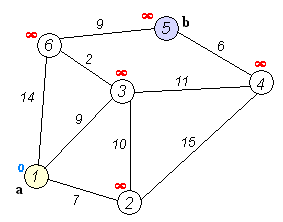

### Setup

In [12]:
# install graph realted packages
%pip install matplotlib numpy networkx plotly


   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB 217.9 kB/s eta 0:01:16
   ---------------------------------------- 0.0/16.4 MB 196.9 kB/s eta 0:01:24
   ---------------------------------------- 0.0/16.4 MB 196.9 kB/s eta 0:01:24
   ---------------------------------------- 0.1/16.4 MB 286.7 kB/s eta 0:00:57
   ---------------------------------------- 0.1/16.4 MB 291.5 kB/s eta 0:00:56
   ---------------------------------------- 0.1/16.4 MB 343.4 kB/s eta 0:00:48
   ---------------------------------------- 0.1/16.4 MB 387.0 kB/s eta 0:00:43
   ---------------------------------------- 0.2/16.4 MB 428.8 kB/s eta 0:00:38
    --------------------------------------- 0.2/16.4 MB 514.3 kB/s eta 0:00:32
    -----

### Generate a random graph

Generating random graph with N=5 nodes and M=10 edges


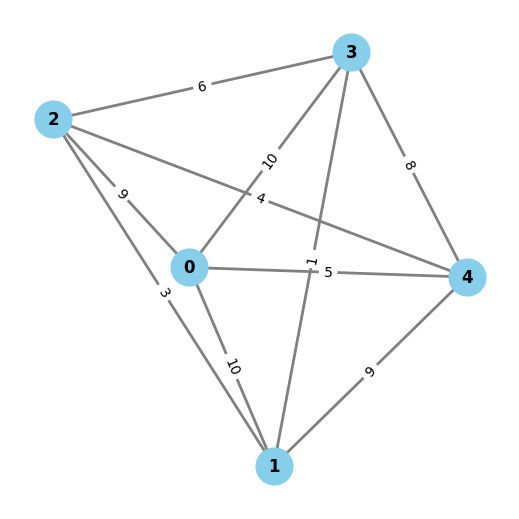

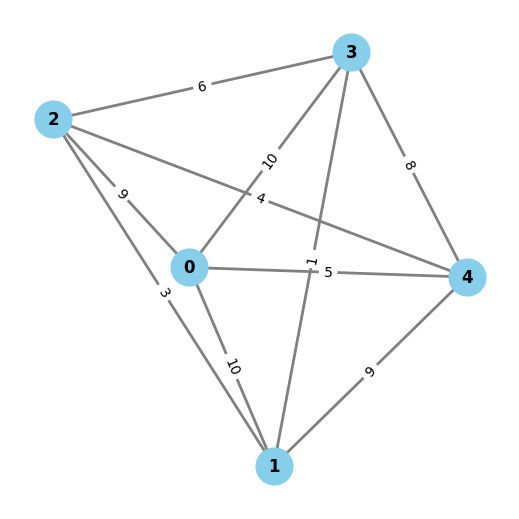

In [8]:
import random
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Set a fixed seed for the random number generator
random.seed(0)
np.random.seed(0)

def generate_random_graph(N, M=math.inf):
    G = nx.Graph()
    for i in range(N):
        G.add_node(i)

    # Calculate the maximum number of possible edges
    # Ensure M is not bigger than the maximum number of possible edges
    max_edges = (N * (N - 1)) // 2  

    M = min(M, max_edges)  
    print("Generating random graph with N={} nodes and M={} edges".format(N, M))

    for i in range(M):
        u = random.randint(0, N-1)
        v = random.randint(0, N-1)
        while u == v or G.has_edge(u, v):
            u = random.randint(0, N-1)
            v = random.randint(0, N-1)
        weight = random.randint(1, 10)  # Generate a random weight between 1 and 10
        G.add_edge(u, v, weight=weight)  # Assign the random weight to the edge
    return G

# implement plot graph
def plot_graph(G, pos=None,path=None):
    if pos is None:
        pos = nx.spring_layout(G,seed=0)

        
    plt.figure(figsize=(5, 5))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_weight="bold", width=2, edge_color="gray")
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    if path is not None:
        nx.draw_networkx_edges(
            G,
            pos,
            edgelist=[(path[i], path[i + 1]) for i in range(len(path) - 1)],
            edge_color="red",
            width=2,
        )

    plt.axis("off")
    plt.show()  

G = generate_random_graph(5)
plot_graph(G)


Shortest path from node 0 to node 2 is: [0, 2]
Shortest path length: 10


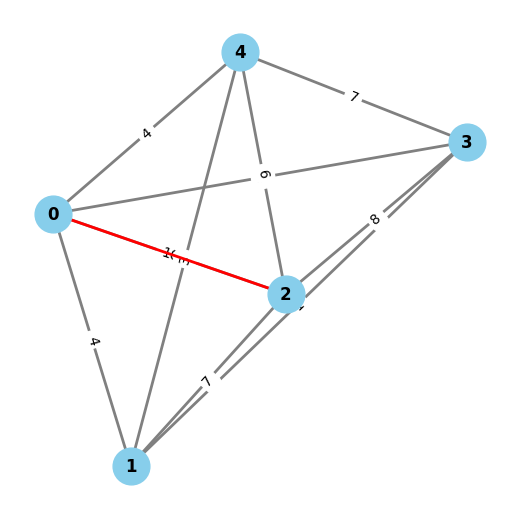

In [67]:
def dijkstra(G, start,end):
    shortest_path = nx.dijkstra_path(G, start, end)
    shortest_path_length = nx.dijkstra_path_length(G, start, end)
    print("Shortest path from node {} to node {} is: {}".format(start, end, shortest_path))
    print("Shortest path length: {}".format(shortest_path_length))

    return shortest_path, shortest_path_length


shortest_path, shortest_path_length = dijkstra(G, 0, 2)
plot_graph(G, path=shortest_path)

In [53]:
dijkstra(G, 0, 2)

Shortest path from node 0 to node 2 is: [0, 1, 2]
Shortest path length: 5
